# Forecasting Non-Performing Loans (NPLs)

### Importing Dependencies

In [119]:
import pandas as pd
from pathlib import Path

In [120]:
df=pd.read_csv(Path('./Data/df_clean.csv'))
df.head()

,DATE,GDP,WTI,U_RATE,X_RATE,CPI,CR_GROWTH,NPL,M2,N_RESV,...,PRIME,T_PROV,S_PROV,M2_YYC,N_RESV_YYC,O_PROD_PC,N_GAS_PC,CR_GROWTH_YY,INFL,CEM_SALES_PC
0,Mar-95,2.4,18.4,18.1,5.9468,31.30,7072.3,9.0,9986.7,338.5,...,16.0,73.9,56.1,3.46%,-1597.79%,-0.08%,2.75%,NaN,5.3,13.97%
1,Jun-95,4.9,19.4,16.5,5.9466,31.87,7188.8,9.9,9934.4,358.9,...,15.0,66.8,50.5,6.85%,-753.73%,0.63%,3.34%,NaN,5.3,8.50%
2,Sep-95,3.6,17.8,17.8,5.9240,32.23,7169.1,9.4,9885.9,360.0,...,15.0,63.0,50.7,6.18%,3429.41%,-0.51%,4.71%,NaN,5.7,2.41%
3,Dec-95,4.2,18.2,16.3,5.9694,32.40,7188.3,10.2,10453.0,346.2,...,14.0,51.1,42.2,3.49%,32.19%,-1.38%,5.13%,NaN,3.8,8.87%
4,Mar-96,4.2,19.8,17.1,5.9995,32.43,7249.7,10.9,9944.2,331.2,...,15.5,44.4,37.5,-0.43%,-2.16%,1.50%,14.60%,2.51%,3.5,4.18%


In [121]:
df.isna().sum()

DATE            0
GDP             0
WTI             0
U_RATE          0
X_RATE          0
CPI             0
CR_GROWTH       0
NPL             0
M2              0
N_RESV          0
N_GAS           0
O_PROD          0
CEM_SALES       0
WA_LR           0
PRIME           0
T_PROV          0
S_PROV          0
M2_YYC          0
N_RESV_YYC      0
O_PROD_PC       0
N_GAS_PC        0
CR_GROWTH_YY    4
INFL            0
CEM_SALES_PC    0
dtype: int64

In [122]:
df.dtypes

DATE             object
GDP             float64
WTI             float64
U_RATE          float64
X_RATE          float64
CPI             float64
CR_GROWTH       float64
NPL             float64
M2              float64
N_RESV          float64
N_GAS           float64
O_PROD          float64
CEM_SALES       float64
WA_LR           float64
PRIME           float64
T_PROV          float64
S_PROV          float64
M2_YYC           object
N_RESV_YYC       object
O_PROD_PC        object
N_GAS_PC         object
CR_GROWTH_YY     object
INFL            float64
CEM_SALES_PC     object
dtype: object

### Data-Preprocessing

In [123]:
# Converting M2_YYC to float
df['M2_YYC'] = df['M2_YYC'].str.replace('%', '')
df['M2_YYC'] = df['M2_YYC'].astype(float).round(2)

# Converting N_RESV_YYC to float
df['N_RESV_YYC'] = df['N_RESV_YYC'].str.replace('%', '')
df['N_RESV_YYC'] = df['N_RESV_YYC'].astype(float).round(2)

# Converting O_PROD_PC to float
df['O_PROD_PC'] = df['O_PROD_PC'].str.replace('%', '')
df['O_PROD_PC'] = df['O_PROD_PC'].astype(float).round(2)

# Converting N_GAS_PC to float
df['N_GAS_PC'] = df['N_GAS_PC'].str.replace('%', '')
df['N_GAS_PC'] = df['N_GAS_PC'].astype(float).round(2)

# Converting R_GROWTH_YY to float
df['CR_GROWTH_YY'] = df['CR_GROWTH_YY'].str.replace('%', '')
df['CR_GROWTH_YY'] = df['CR_GROWTH_YY'].astype(float).round(2)

# Converting CEM_SALES_PC to float
df['CEM_SALES_PC'] = df['CEM_SALES_PC'].str.replace('%', '')
df['CEM_SALES_PC'] = df['CEM_SALES_PC'].astype(float).round(2)

In [124]:
df.isna().sum()

DATE            0
GDP             0
WTI             0
U_RATE          0
X_RATE          0
CPI             0
CR_GROWTH       0
NPL             0
M2              0
N_RESV          0
N_GAS           0
O_PROD          0
CEM_SALES       0
WA_LR           0
PRIME           0
T_PROV          0
S_PROV          0
M2_YYC          0
N_RESV_YYC      0
O_PROD_PC       0
N_GAS_PC        0
CR_GROWTH_YY    4
INFL            0
CEM_SALES_PC    0
dtype: int64

In [125]:
df.CR_GROWTH_YY.describe()

count    101.000000
mean       9.149307
std        8.807964
min       -4.360000
25%        4.000000
50%        5.650000
75%       14.090000
max       35.940000
Name: CR_GROWTH_YY, dtype: float64

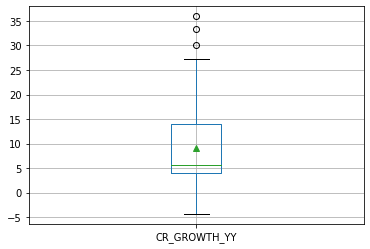

In [126]:
df.boxplot(column=['CR_GROWTH_YY'], showmeans=True);

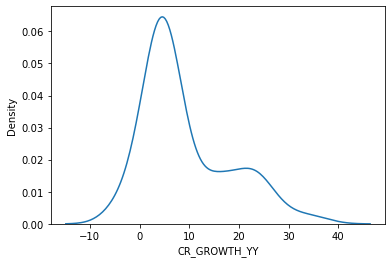

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(df['CR_GROWTH_YY'])
plt.show()

#### Replace missing CR_GROWTH_YY values with median 

In [128]:
u_range = [0, 1, 2, 3]
for i in u_range:
    df["CR_GROWTH_YY"][i] = 5.65

C:\Users\USER\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [129]:
df.to_csv(r'C:\Users\USER\Documents\Analysis_Projects\NPL_Forecast\NPL_Forecast_TrinidadTobago\Data\df_clean2.csv', index = False, header=True)

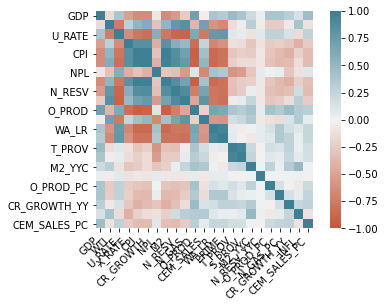

In [130]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [131]:
df.corr()

,GDP,WTI,U_RATE,X_RATE,CPI,CR_GROWTH,NPL,M2,N_RESV,N_GAS,...,PRIME,T_PROV,S_PROV,M2_YYC,N_RESV_YYC,O_PROD_PC,N_GAS_PC,CR_GROWTH_YY,INFL,CEM_SALES_PC
GDP,1.000000,-0.154950,0.392182,-0.524561,-0.636480,-0.631087,-0.075548,-0.647044,-0.546367,-0.247251,...,0.331532,0.481335,0.390703,0.191458,0.033756,0.394595,0.390648,0.312032,0.147432,0.463552
WTI,-0.154950,1.000000,-0.735117,0.293952,0.530543,0.590138,-0.301137,0.530255,0.788523,0.847394,...,-0.662355,-0.127699,-0.034869,0.309332,-0.046162,-0.250046,-0.243752,-0.054313,0.399573,-0.086341
U_RATE,0.392182,-0.735117,1.000000,-0.634439,-0.785475,-0.825365,0.578168,-0.771119,-0.875774,-0.892714,...,0.778702,0.088005,0.052976,-0.087665,0.082179,0.275823,0.279828,0.133886,-0.140089,0.279792
X_RATE,-0.524561,0.293952,-0.634439,1.000000,0.852861,0.846680,-0.432810,0.834105,0.581959,0.486106,...,-0.607876,-0.116844,-0.118909,-0.277983,-0.091966,-0.231954,-0.224840,-0.261629,-0.402651,-0.253812
CPI,-0.636480,0.530543,-0.785475,0.852861,1.000000,0.982284,-0.308986,0.996991,0.862597,0.696635,...,-0.803288,-0.283397,-0.219819,-0.236338,-0.069062,-0.274947,-0.354118,-0.419045,-0.204548,-0.332261
CR_GROWTH,-0.631087,0.590138,-0.825365,0.846680,0.982284,1.000000,-0.399393,0.976350,0.882271,0.762525,...,-0.793709,-0.219743,-0.141767,-0.148067,-0.070787,-0.310198,-0.361607,-0.349826,-0.131830,-0.341452
NPL,-0.075548,-0.301137,0.578168,-0.432810,-0.308986,-0.399393,1.000000,-0.274860,-0.316535,-0.544567,...,0.364581,-0.595136,-0.533078,-0.272483,0.063831,0.008305,0.044194,-0.274598,-0.113161,0.098957
M2,-0.647044,0.530255,-0.771119,0.834105,0.996991,0.976350,-0.274860,1.000000,0.863595,0.682426,...,-0.799770,-0.303341,-0.230097,-0.223359,-0.068193,-0.266275,-0.362881,-0.426767,-0.214900,-0.321461
N_RESV,-0.546367,0.788523,-0.875774,0.581959,0.862597,0.882271,-0.316535,0.863595,1.000000,0.889337,...,-0.800591,-0.313631,-0.227365,0.039990,-0.065199,-0.315212,-0.355128,-0.317595,0.186029,-0.341293
N_GAS,-0.247251,0.847394,-0.892714,0.486106,0.696635,0.762525,-0.544567,0.682426,0.889337,1.000000,...,-0.816368,-0.038913,0.047296,0.242394,-0.069487,-0.268849,-0.237732,-0.118670,0.307265,-0.249325


### Developing Model

In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#### Based on the correlation matrix in NLP_Forecast1.ipynb we will go with the following variables first

In [133]:
# X=df[['GDP', 'U_RATE', 'CPI', 'CR_GROWTH', 'M2', 'O_PROD', 'CEM_SALES', 'N_GAS', 'X_RATE', 'N_RESV', 'WTI', 'WA_LR', 'PRIME']]
# X=df[['GDP', 'U_RATE', 'CR_GROWTH', 'M2', 'O_PROD', 'CEM_SALES', 'N_GAS', 'X_RATE', 'N_RESV', 'WTI', 'WA_LR', 'PRIME']]
# X=df[['GDP', 'U_RATE', 'CR_GROWTH', 'M2', 'O_PROD', 'CEM_SALES', 'X_RATE', 'N_RESV', 'WTI', 'WA_LR', 'PRIME']]
# X=df[['GDP', 'U_RATE', 'CR_GROWTH', 'M2', 'O_PROD', 'CEM_SALES', 'X_RATE', 'WTI', 'WA_LR', 'PRIME']]
# X=df[['GDP', 'U_RATE', 'CR_GROWTH', 'M2', 'CEM_SALES', 'X_RATE', 'WTI', 'WA_LR', 'PRIME']]
# X=df[['GDP', 'U_RATE', 'CR_GROWTH', 'M2', 'CEM_SALES', 'X_RATE', 'WTI', 'WA_LR']]
# X=df[['GDP', 'U_RATE', 'M2', 'CEM_SALES', 'X_RATE', 'WTI', 'WA_LR']]
# X=df[['GDP', 'M2', 'CEM_SALES', 'X_RATE', 'WTI', 'WA_LR']]
# X=df[['M2', 'CEM_SALES', 'X_RATE', 'WTI', 'WA_LR']]
# X = df.drop(columns="status")
# X = df.drop(columns="NPL")
x_cols = [i for i in df.columns if i not in ('DATE', 'NPL','T_PROV', 'S_PROV', 'O_PROD_PC', 'CPI', 'N_RESV_YYC',
                                            'INFL', 'N_GAS', 'O_PROD', 'N_RESV', 'WA_LR', 'PRIME', 'U_RATE', 'CEM_SALES_PC',
                                            'N_GAS_PC', 'M2', 'CR_GROWTH')]
X = df[x_cols]

# X=df[['GDP']].values.reshape(-1, 1)
# X=df[['GDP', 'CEM_SALES', 'CPI']]
y=df['NPL']

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### Scaling the Data

In [135]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_scaler=scaler.fit(X_train)

X_train_scaled=X_scaler.transform(X_train)
X_test_scaled=X_scaler.transform(X_test)

In [136]:
model=LinearRegression()

In [137]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [138]:
y_pred=model.predict(X_test_scaled)

### Testing Model

In [139]:
# Import Dependencies
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

In [140]:
results=OLS(y_train, add_constant(X_train_scaled)).fit()

In [141]:
variables=results.model.exog

In [142]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NPL   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     35.66
Date:                Sat, 17 Jul 2021   Prob (F-statistic):           1.83e-18
Time:                        14:36:12   Log-Likelihood:                -103.93
No. Observations:                  70   AIC:                             221.9
Df Residuals:                      63   BIC:                             237.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2414      0.135     31.521      0.000       3.973       4.510
x1            -0.5969      0.170     -3.502      0.001      -0.937      -0.256
x2             0.8818      0.195      4.517      0.000       0.492       1.272
x3            -1.4760      0.179     -8.251      0.000      -1.834      -1.119
x4            -1.4694      0.195     -7.534      0.000      -1.859      -1.080
x5            -0.3973      0.163     -2.432      0.018      -0.724      -0.071
x6            -0.6199      0.155     -3.992      0.000      -0.930      -0.310
==============================================================================
Omnibus:                        1.508   Durbin-Watson:                   2.296
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                0.870
Skew:                           0.007   Prob(JB):                        0.647
Kurtosis:                       3.546   Cond. No.                         2.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Linear Regression Diagnostics

#### Linearity

In [143]:
import numpy as np

In [144]:
y_pred_train=results.predict()

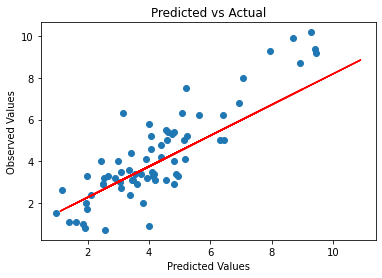

In [145]:
plt.plot(y_pred_train, y_train, 'o')
plt.title('Predicted vs Actual')
plt.xlabel('Predicted Values')
plt.ylabel('Observed Values')
m, b = np.polyfit(y_test, y_pred, 1)
g=plt.plot(y_test, m*y_test+b, color='red')


g

#### Normality of Error Terms

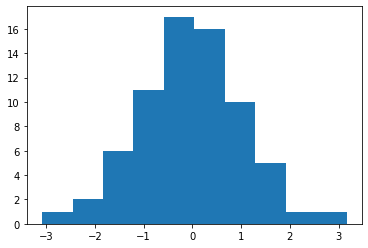

In [146]:
plt.hist(results.resid)
plt.show()

In [147]:
from scipy.stats import shapiro
stat, p = shapiro(results.resid)
print('stat=%.3f, p=%.3f' % (stat, p))

stat=0.992, p=0.921


#### Multicollinearity Among Predictors

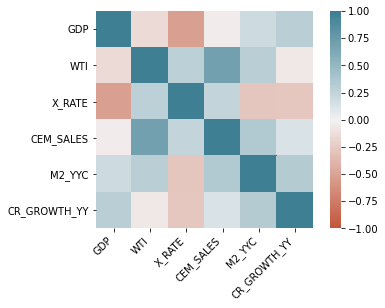

In [148]:
corr = X.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [149]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [150]:
list1=X.columns
list2=['CONST']
list2.extend(list1)
print(list2)

['CONST', 'GDP', 'WTI', 'X_RATE', 'CEM_SALES', 'M2_YYC', 'CR_GROWTH_YY']


In [151]:
vif_data = pd.DataFrame()
# vif_data['feature']=X.columns.values
vif_data['feature']=list2
vif_data['VIF']=[variance_inflation_factor(variables, i) for i in range((variables.shape[1]))]
# vif_data['VIF']=[variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

        feature       VIF
0         CONST  1.000000
1           GDP  1.604162
2           WTI  2.104788
3        X_RATE  1.767394
4     CEM_SALES  2.100835
5        M2_YYC  1.474154
6  CR_GROWTH_YY  1.331714


### Testing for No Autocorrelation in Errors

#### Observing the Durbin-Watson Statistic

#### Homoscedasticity

In [152]:
data=[df['DATE'], df['NPL']]
df1=pd.concat(data, axis=1)
df1['Time_Period']=range(1, len(df1)+1)

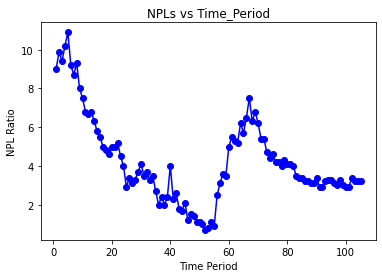

In [153]:
plt.plot(df1.Time_Period, df1.NPL, 'bo-')
plt.title('NPLs vs Time_Period')
plt.xlabel('Time Period')
plt.ylabel('NPL Ratio')
plt.show()

In [154]:
scaler=StandardScaler()

X1_scaler=scaler.fit(X)
X1_scaled=X1_scaler.transform(X)

results1=OLS(y, add_constant(X1_scaled)).fit()
df1['Residuals']=results1.resid

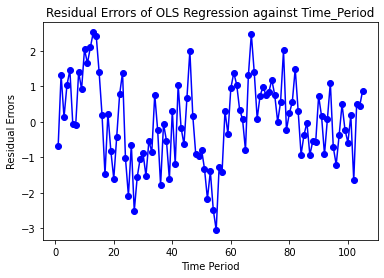

In [155]:
plt.plot(df1.Time_Period, df1.Residuals, 'bo-')
plt.title('Residual Errors of OLS Regression against Time_Period')
plt.xlabel('Time Period')
plt.ylabel('Residual Errors')
plt.show()

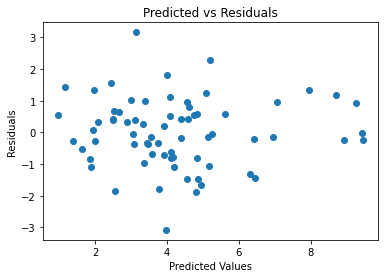

In [156]:
plt.plot(y_pred_train, results.resid, 'o')
plt.title('Predicted vs Residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [157]:
import statsmodels.stats.api as sms
test=sms.het_breuschpagan(results.resid, results.model.exog)
print(test)

(6.090570705817911, 0.4131212172561866, 1.000650344047271, 0.43293885009454025)


#### Calculating Mean Squared Error for Multivariate Linear Regression Model NPLs

In [158]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

2.1026980341204875
